In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
# train_test_split stratify
#  y = np.array([0, 0, 0, 1, 1, 1, 1, 1]) # Imbalanced classes: 3 of class 0, 5 of class 1
#  stratify=y ensures that the proportion of class 0 and class 1 in y_train and y_test 
#  is maintained as closely as possible to their proportion in the original y.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# CART -- classification and regression tree

In [ ]:
# Weighted AVG

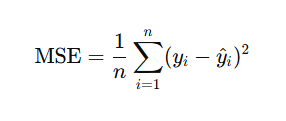

In [2]:
# MSE case 1 
arr1 = np.array([3, 5, 7])  # true
arr2 = np.array([2, 4, 6])  # predicted
# (3 - 2)² + (5 - 4)² + (7 - 6)²
# -----------------------------
#              3

print('np.mean((arr1 - arr2)**2):     ', np.mean((arr1 - arr2)**2))

np.mean((arr1 - arr2)**2):      1.0


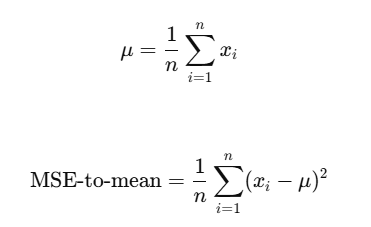

In [3]:
# MSE case 2
arr = np.array([3, 5, 7])  # predicted
arr_avg = 5  # true
# (5 - 3)² + (5 - 5)² + (5 - 7)²
# -----------------------------
#             3

print('np.mean((arr - arr.mean())**2):', np.mean((arr - arr.mean())**2))

np.mean((arr - arr.mean())**2): 2.6666666666666665


In [47]:
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array( [1, 2, 3, 8, 9, 10])
X_reg = np.array([1, 2, 3, 4, 5, 6])

# MSE-to-mean
print('np.mean(([1, 2, 3, 8, 9, 10])- np.array([1, 2, 3, 8, 9, 10]).mean())**2):', 
      np.mean((np.array([1, 2, 3, 8, 9, 10]) - np.array([1, 2, 3, 8, 9, 10]).mean())**2))

mse_root = np.mean((np.array([1, 2, 3, 8, 9, 10]) - np.array([1, 2, 3, 8, 9, 10]).mean())**2)

print('mse root', mse_root)

print('X', X_reg)
print('Y', y)

print() 

# 12.916666666666666 -- Root
# X < 3
# NO: MSE-to-mean
# YES: MSE-to-mean
# Weighted Avg
y_true =  y[X_reg < 3]
y_false = y[X_reg >= 3]
y_true_mse = np.mean((y_true - y_true.mean())**2)
y_false_mse = np.mean((y_false - y_false.mean())**2)
mse_weighted = y_true_mse * (len(y_true) / len(y)) + y_false_mse * (len(y_false) / len(y))
print('mse for TRUE  X < 3 ==> ', y_true_mse, 'x:', X_reg[X_reg < 3], '   y:', y_true, 'prediction:',  np.mean(y_true))
print('mse for FALSE X < 3 ==> ', y_false_mse, 'x', X_reg[X_reg >= 3], 'y:', y_false, 'prediction:',  np.mean(y_false))
print('mse for Weighted ==> ',mse_weighted)
print('mse Gain ==> ',mse_root - mse_weighted)

print() 
# X < 4
# NO: MSE-to-mean
# YES: MSE-to-mean
# Weighted Avg
y_true =  y[X_reg < 4]
y_false = y[X_reg >= 4]
y_true_mse = np.mean((y_true - y_true.mean())**2)
y_false_mse = np.mean((y_false - y_false.mean())**2)
mse_weighted = y_true_mse * (len(y_true) / len(y)) + y_false_mse * (len(y_false) / len(y))
print('mse for TRUE  X < 4 ==> ', y_true_mse, 'x:', X_reg[X_reg < 4],'y:', y_true, 'prediction:',  np.mean(y_true))
print('mse for FALSE X < 4 ==> ', y_false_mse, 'x:', X_reg[X_reg >= 4],'y:', y_false, 'prediction:',  np.mean(y_false))
print('mse for Weighted ==> ',mse_weighted)
print('mse Gain ==> ',mse_root - mse_weighted)

np.mean(([1, 2, 3, 8, 9, 10])- np.array([1, 2, 3, 8, 9, 10]).mean())**2): 12.916666666666666
mse root 12.916666666666666
X [1 2 3 4 5 6]
Y [ 1  2  3  8  9 10]

mse for TRUE  X < 3 ==>  0.25 x: [1 2]    y: [1 2] prediction: 1.5
mse for FALSE X < 3 ==>  7.25 x [3 4 5 6] y: [ 3  8  9 10] prediction: 7.5
mse for Weighted ==>  4.916666666666666
mse Gain ==>  8.0

mse for TRUE  X < 4 ==>  0.6666666666666666 x: [1 2 3] y: [1 2 3] prediction: 2.0
mse for FALSE X < 4 ==>  0.6666666666666666 x: [4 5 6] y: [ 8  9 10] prediction: 9.0
mse for Weighted ==>  0.6666666666666666
mse Gain ==>  12.25


In [55]:
from sklearn.tree import DecisionTreeRegressor, export_text

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array( [1, 2, 3, 8, 9, 10])

tree = DecisionTreeRegressor(
    criterion="squared_error",  # MSE criterion
    max_depth=3,
    random_state=42
)

tree.fit(X, y)

y_pred = tree.predict(X)

print(X.ravel())
print("y true: ", y)
print("y pred: ", y_pred)

tree_rules = export_text(tree, feature_names=["x"])
print(tree_rules)


[1 2 3 4 5 6]
y true:  [ 1  2  3  8  9 10]
y pred:  [ 1.  2.  3.  8.  9. 10.]
|--- x <= 3.50
|   |--- x <= 1.50
|   |   |--- value: [1.00]
|   |--- x >  1.50
|   |   |--- x <= 2.50
|   |   |   |--- value: [2.00]
|   |   |--- x >  2.50
|   |   |   |--- value: [3.00]
|--- x >  3.50
|   |--- x <= 4.50
|   |   |--- value: [8.00]
|   |--- x >  4.50
|   |   |--- x <= 5.50
|   |   |   |--- value: [9.00]
|   |   |--- x >  5.50
|   |   |   |--- value: [10.00]



In [70]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import r2_score

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array( [1, 2, 3, 8, 9, 10])

tree = DecisionTreeRegressor(
    criterion="squared_error",  # MSE criterion
    max_depth=1,
    random_state=42
)

tree.fit(X, y)

y_pred = tree.predict(X)

print(X.ravel())
print("y true: ", y)
print("y pred: ", y_pred)

tree_rules = export_text(tree, feature_names=["x"])
print(tree_rules)

# MSE -- train
# MSE case 1 
# arr1 = np.array([3, 5, 7])  # true
# arr2 = np.array([2, 4, 6])  # predicted
#
# (3 - 2)² + (5 - 4)² + (7 - 6)²
# -----------------------------
#              3
print('np.mean((pred - true)**2): ', np.mean((y_pred - y)**2))

# R²
# 0.948
r_square = 1 - np.sum((y_pred - y)**2) / np.sum((y - np.mean(y))**2)
print('Performance R²', r_square)
print('Performance R²', r2_score(y, y_pred), 'r2_score')

[1 2 3 4 5 6]
y true:  [ 1  2  3  8  9 10]
y pred:  [2. 2. 2. 9. 9. 9.]
|--- x <= 3.50
|   |--- value: [2.00]
|--- x >  3.50
|   |--- value: [9.00]

np.mean((pred - true)**2):  0.6666666666666666
Performance R² 0.9483870967741935
Performance R² 0.9483870967741935 r2_score


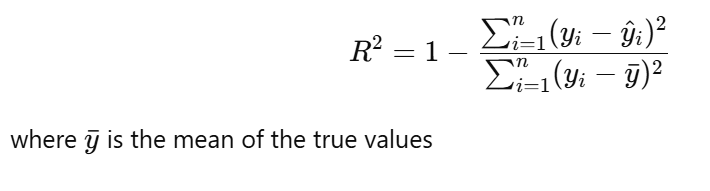

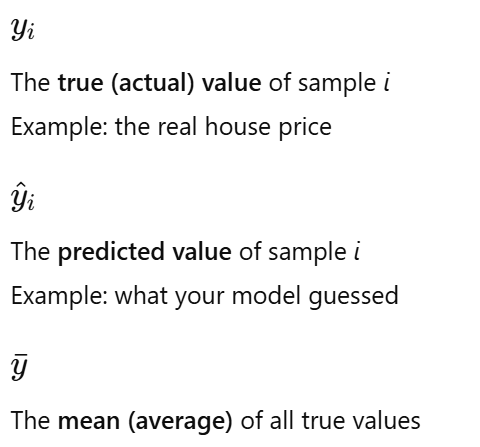

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Simple example data: [feature1, feature2], labels (0 or 1)
X = [
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 5],
    [5, 4],
    [6, 7],
    [7, 6],
    [8, 8]
]
y = [0, 0, 0, 1, 1, 1, 1, 0]  # Labels (not perfectly separable!)

# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

# Print evaluation results
print(f'Accuracy: {acc}')
print('Confusion Matrix:')
print(cm)

# Predict a single new value
new_sample = [[5, 5]]
single_pred = model.predict(new_sample)
print(f'\nPrediction for input {new_sample[0]}: {single_pred[0]}')

Accuracy: 0.75
Confusion Matrix:
[[2 1]
 [0 1]]

Prediction for input [5, 5]: 1
